In [ ]:
#1  2   3   4
#5  6   7   8
#9  10  11  12

In [217]:
import numpy as np
import matplotlib.pyplot as plt

def compute_energy(couplings, spins):
    assert couplings.shape[0] == len(spins), "Number of spins must match couplings matrix size."
    energy = 0
    num_spins = len(spins)
    for i in range(num_spins):
        for j in range(i+1,num_spins):
            energy += couplings[i, j] * spins[i] * spins[j]
    return -energy

N=12
couplings = np.matrix([[0, np.random.normal(0,1), 0, 0, np.random.normal(0,1), 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, np.random.normal(0,1), 0, 0, np.random.normal(0,1), 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, np.random.normal(0,1), 0, 0, np.random.normal(0,1), 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, np.random.normal(0,1), 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, np.random.normal(0,1), 0, 0, np.random.normal(0,1), 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, np.random.normal(0,1), 0, 0, np.random.normal(0,1), 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, np.random.normal(0,1), 0, 0, np.random.normal(0,1), 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, np.random.normal(0,1)],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, np.random.normal(0,1), 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, np.random.normal(0,1), 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, np.random.normal(0,1)],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ,0]])

spins = np.array([1,1,1,1,1,1,1,1,1,1,1,1])
energy = compute_energy(couplings, spins)
print("Computed energy:", energy)

Computed energy: 1.7641441581453867


In [ ]:
#1  2   3   4  5
#6  7   8   9  10
#11 12  13  14 15
#16 17  18  19 20

In [137]:
N = 20
couplings = np.zeros((N,N))
for i in range(N):
    if (i+1) % 5 != 0:  # not on the right edge
        couplings[i, i+1] = np.random.normal(0,1)
    if i < N-5:  # not on the bottom edge
        couplings[i, i+5] = np.random.normal(0,1)

spins = np.ones(N, dtype=int)
energy = compute_energy(couplings, spins)
print("Computed energy for 4x5 lattice:", energy)

Computed energy for 4x5 lattice: -0.9297636749939664


In [218]:
import itertools

def bruteforce_minimize(couplings):
    """
    Brute-force search over all spin configurations (+1/-1) to minimize energy.

    Returns:
      best_energy (float), best_configs (list of numpy arrays)
    """
    best_energy = float('inf')
    best_configs = []

    for config in itertools.product([1, -1], repeat=N-1):
        spins_cfg = np.array(config, dtype=int)
        spins_cfg = np.insert(spins_cfg, 0, 1)
        e = compute_energy(couplings, spins_cfg)
        if e < best_energy:
            best_energy = e
            best_configs = [spins_cfg.copy()]
        elif e == best_energy:
            best_configs.append(spins_cfg.copy())

    return best_energy, best_configs

# run brute-force using existing variables `couplings` and `compute_energy`
best_energy, best_configs = bruteforce_minimize(couplings)
print("Best energy:", best_energy)
print("Number of optimal configurations:", len(best_configs))
for i, cfg in enumerate(best_configs):
    print(f"Config #{i+1}:", cfg)

Best energy: -13.03538245047407
Number of optimal configurations: 1
Config #1: [ 1 -1  1 -1 -1  1 -1 -1  1  1  1 -1]


In [219]:
possible_configs = list(itertools.product([1, -1], repeat=N-1))

# Define the objective function
def my_f(x):
    """
    Objective function to minimize.
    Converts x to an integer index and returns the negative sequence cost.
    """
    x = int(round(x[0]))  # Ensure x is a single integer index
    if 0 <= x < 2**(N-1):  # Check bounds
        spins_cfg = np.array(possible_configs[x], dtype=int)
        spins_cfg = np.insert(spins_cfg, 0, 1)
        return compute_energy(couplings, spins_cfg)
    else:
        return float('inf')  # Return a large value if out of bounds

In [224]:
from scipy.optimize import dual_annealing
bounds = [(0, 2**N - 1)]
res = dual_annealing(my_f, bounds=bounds, maxiter=500,no_local_search=True)
print("Minimum energy found:", res.fun)
print("Spin configuration:", [1] + list(possible_configs[int(round(res.x[0]))]))

Minimum energy found: -13.03538245047407
Spin configuration: [1, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, -1]


<h2>Hamiltonian Mapping</2>

In [235]:
sample_size = 300

spectrum = np.zeros(2**(N-1))
energy_values = []

sample_index = np.random.randint(0,2**(N-1),sample_size)
for idx in sample_index:
    spins_cfg = np.array(possible_configs[idx], dtype=int)
    spins_cfg = np.insert(spins_cfg, 0, 1)
    energy = compute_energy(couplings, spins_cfg)
    spectrum[idx] = energy
    energy_values.append(energy)

In [236]:
thresh = np.percentile(energy_values, 20)
print("Threshold energy (20th percentile):", thresh)
spectrum_filtered = [e if e <= thresh else 0 for e in spectrum]

Threshold energy (20th percentile): -3.7319056822172825


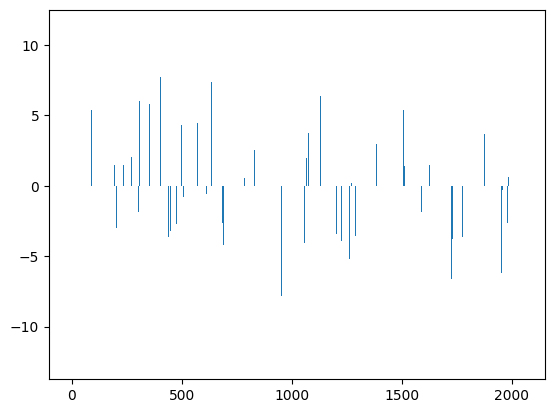

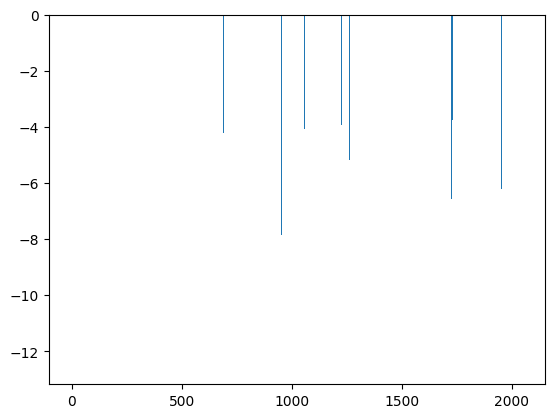

In [237]:
plt.bar(range(len(spectrum)),spectrum)
plt.show()

plt.bar(range(len(spectrum)),spectrum_filtered)
plt.show()